# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [1]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

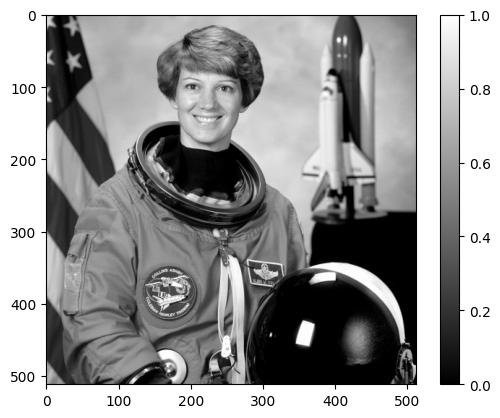

In [9]:
img = plt.imread('data/astronaut.png')

#plt.figure(figsize=(10,5))

plt.imshow(img, 'gray')

plt.colorbar ()

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [44]:

size = 3
def meanfilter(img_in, size):

    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape): #loop over all pixels
        if n<= p[0] < img_in.shape[0]-n and n<= p[1] < img_in.shape[1]-n:
            neighborhood_sum = 0
            for q in numpy.ndindex(size, size): #nachbarschaft
             
                neighborhood_sum = neighborhood_sum + img_in[p[0]+q[0]-n, p[1]+q[1]-n]
            result[p]= neighborhood_sum/(size*size)
            
    return result

    

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

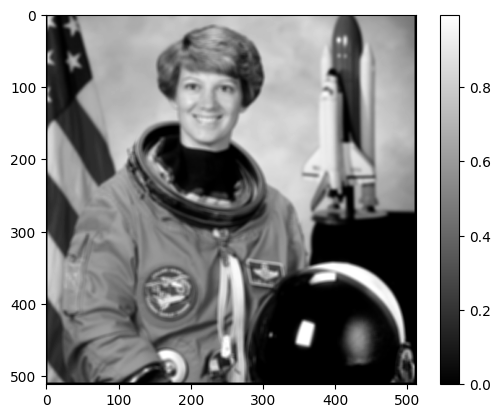

In [46]:
new_img = meanfilter(img, 5)

plt.imshow(new_img, 'gray')


plt.colorbar ()
plt.show()


**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

In [51]:
img_correct = plt.imread('data/astronaut_meanfilter5.png')
assert numpy.allclose(img_correct, new_img, atol= 1/255)




---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [61]:
def medianfilter(img_in, size):

    
    n = (size - 1) // 2
    result = numpy.zeros(img_in.shape)
    for p in numpy.ndindex(img_in.shape): #loop over all pixels
        if n<= p[0] < img_in.shape[0]-n and n<= p[1] < img_in.shape[1]-n:
            neighborhood_list = []
            for q in numpy.ndindex(size, size): #nachbarschaft
                neighborhood_y =p[0]+q[0]-n
                neighborhood_x =p[1]+q[1]-n
                intensity = img_in[neighborhood_y, neighborhood_x]
                neighborhood_list.append(intensity)
                #neighborhood_list = [intensity]
                neighborhood_list.sort()
            mid_index = len(neighborhood_list)//2
            result[p]= neighborhood_list[mid_index]
            
    
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

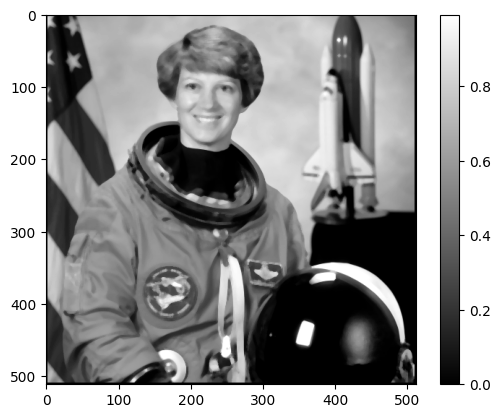

In [62]:
new_img = medianfilter(img, 5)

plt.imshow(new_img, 'gray')


plt.colorbar ()
plt.show()

Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

In [63]:
img_correct = plt.imread('data/astronaut_medianfilter5.png')
assert numpy.allclose(img_correct, new_img, atol= 1/255)


---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img_in, size):
    ...

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: